In [1]:
from IPython.display import YouTubeVideo

# 1. Intro to Unscented Kalman Filter Project

## Project Introduction
Now it is time to implement an unscented Kalman filter using the CTRV motion model. You will be using the same bicycle simulation data set from the extended Kalman filter project. That way you can compare your results with the EKF project.

Remember that all Kalman filters have the same three steps:

- Initialization
- Prediction
- Update

A standard Kalman filter can only handle linear equations. Both the extended Kalman filter and the unscented Kalman filter allow you to use non-linear equations; the difference between EKF and UKF is how they handle non-linear equations. But the basics are the same: initialize, predict, update.

## Rubric
Take a look at [the rubric](https://review.udacity.com/#!/rubrics/783/view) before you get started.

## Project Resources
We have provided a [project repository](https://github.com/udacity/CarND-Unscented-Kalman-Filter-Project) with starter code.

The repository contains:

- starter code in the src folder
- a README file with instructions on compiling the code
- CMakeLists.txt file that will be used when compiling your code (you do not need to change this file)

## Using GitHub and Creating Effective READMEs
If you are unfamiliar with GitHub , Udacity has a brief [GitHub tutorial](http://blog.udacity.com/2015/06/a-beginners-git-github-tutorial.html) to get you started. Udacity also provides a more detailed free [course on git and GitHub](https://www.udacity.com/course/how-to-use-git-and-github--ud775).

To learn about REAMDE files and Markdown, Udacity provides a free course on READMEs, as well.

GitHub also provides a [tutorial](https://guides.github.com/features/mastering-markdown/) about creating Markdown files.

## Dependencies
Keep in mind that the minimum project dependency versions are:

- cmake: 3.5
    - All OSes: click here for installation instructions
- make: 4.1 (Linux and Mac), 3.81 (Windows)
    - Linux: make is installed by default on most Linux distros
    - Mac: install Xcode command line tools to get make
    - Windows: Click here for installation instructions
- gcc/g++: 5.4
    - Linux: gcc / g++ is installed by default on most Linux distros
    - Mac: same deal as make - install Xcode command line tools
    - Windows: recommend using MinGW

## Optional Resources
To complete the project, you only need the files in the github repo; however, we are also providing some extra resources that you can use to develop your solution:

- A [Sensor Fusion utilities repo](https://github.com/udacity/CarND-Mercedes-SF-Utilities) containing Matlab scripts that will generate more sample data (generating your own sample data is completely optional)
- A visualization package that you can also find within [the Sensor Fusion utilities repo](https://github.com/udacity/CarND-Mercedes-SF-Utilities)
- a 2-dimensional Unity simulator for visualizing your results. See the "2-D Unity Simulator" lecture slides for more information.


# 2. File Structure

## Files in the Github src Folder
The files you need to work with are in the src folder of the github repository.

- main.cpp - reads in data, calls a function to run the Unscented Kalman filter, calls a function to calculate RMSE
- ukf.cpp - initializes the Unscented Kalman filter, calls the predict and update function, defines the predict and update functions
- tools.cpp - function to calculate RMSE

The only files you need to modify are ukf.cpp and tools.cpp.

## Data
The data file information is provided by the simulator and is the same data files from EKF. Again each line in the data file represents either a lidar or radar measurement marked by "L" or "R" on the starting line. The next columns are either the two lidar position measurements (x,y) or the three radar position measurements (rho, phi, rho_dot). Then comes the time stamp and finally the ground truth values for x, y, vx, vy, yaw, yawrate.

Although the data set contains values for yaw and yawrate ground truth, there is no need to use these values. main.cpp does not use these values, and you are only expected to calculate RMSE for x, y vx and vy. You can compare your vx and vy RMSE values from the UKF project and the EKF project. For UKF, vx and vy RMSE should be lower than for EKF; this is because we are using a more detailed motion model and UKF is also known for handling non-linear equations better than EKF.

# 3. Project Code

The project has two files that you will need to modify: ukf.cpp and tools.cpp

## UKF.cpp
The ukf.cpp provides a template for your unscented Kalman filter code. The first step will be to initialize your parameters and matrices Here is a snippet from that part of the code:

```c++
/**
 * Initializes Unscented Kalman filter
 */
UKF::UKF() {
  // if this is false, laser measurements will be ignored (except during init)
  use_laser_ = true;

  // if this is false, radar measurements will be ignored (except during init)
  use_radar_ = true;

. . .
```

### Tuning Process Noise
We have provided parameter values for measurement noise as well as process noise. The measurement noise values should not be changed; these are provided by the sensor manufacturer.

The values for the process noise std_a_ and std_yawdd_ are both set to 30. These will need to be adjusted in order to get your Kalman filter working. Think about what a standard deviation of 30 means. For a Gaussian distribution, we expect the acceleration to be between $−60\frac{m}{s^2}$ and $+60\frac{m}{s^2}$ or $−60\frac{rad}{s^2}$ and $+60\frac{rad}{s^2}$ ninety-five percent of the time .

That seems quite high! To put those values in perspective, the fastest measured linear acceleration for a street legal sports car is currently 0 to 60 mph in 2.2 seconds. 0 to 60 mph in 2.2 seconds is about $12\frac{m}{s^2}$. The bike simulation probably tends to have even lower acceleration.

Once your unscented Kalman filter is coded, you'll have to experiment with different process noise values to try and lower RMSE.

### Initializing Variables
You will need to initialize other variables besides the ones given in the ukf.cpp template. We have defined all of the variables that you will need in ukf.h. You can look at ukf.h to see what those variables are called, but there is no need to modify ukf.h.

Pay special attention to how you initialize x and P. For more information go back to the unscented Kalman filter lectures notes titled "What to Expect from the Project".

### Prediction and Update
The rest of the code template contains functions for running the prediction and update steps:

```c++
void UKF::ProcessMeasurement(MeasurementPackage meas_package) {
  /**
  TODO:
  Complete this function! Make sure you switch between lidar and radar
  measurements.
  */
}

/**
 * Predicts sigma points, the state, and the state covariance matrix.
 * @param {double} delta_t the change in time (in seconds) between the last
 * measurement and this one.
 */
void UKF::Prediction(double delta_t) {
  /**
  TODO:
  Complete this function! Estimate the object's location. Modify the state
  vector, x_. Predict sigma points, the state, and the state covariance matrix.
  */
}

/**
 * Updates the state and the state covariance matrix using a laser measurement.
 * @param {MeasurementPackage} meas_package
 */
void UKF::UpdateLidar(MeasurementPackage meas_package) {
  /**
  TODO:
  Complete this function! Use lidar data to update the belief about the object's
  position. Modify the state vector, x_, and covariance, P_.
  You'll also need to calculate the lidar NIS.
  */
}

/**
 * Updates the state and the state covariance matrix using a radar measurement.
 * @param {MeasurementPackage} meas_package
 */
void UKF::UpdateRadar(MeasurementPackage meas_package) {
  /**
  TODO:
  Complete this function! Use radar data to update the belief about the object's
  position. Modify the state vector, x_, and covariance, P_.
  You'll also need to calculate the radar NIS.
  */
```

As a reminder, the ProcessMeasurement() function gets called in main.cpp. The main.cpp code contains a for loop that iterates through the data file one line at a time. For each line in the data file, ProcessMeasurement() gets called sending the sensor data to ukf.cpp

## tools.cpp
The tools.cpp file is similar to the EKF tools file. For this project, you only need to calculate RMSE.

```c++
VectorXd Tools::CalculateRMSE(const vector<VectorXd> &estimations,
                              const vector<VectorXd> &ground_truth) {
  /**
  TODO:
    * Calculate the RMSE here.
  */
}
```

### EKF Versus UKF Repositories
The EKF and UKF repositories are similar, but have small differences.

In the EKF project, there was a separate KalmanFilter class for storing variables and calling the predict and update steps. In this project all of the Kalman filter code will go in the ukf.cpp file.

Also as part of your code, you will need to store laser and radar NIS. The ukf.cpp starter code shows where to calculate NIS.


# 4. Tips

Here are a few tips to keep in mind as you develop your project.

## Tips
### Check out the coding quizzes and coding quiz answers from the lesson
- Use the coding quizzes from the lecture to help guide you. You have already implemented the prediction step and radar update step for the unscented Kalman filter. In the project, you will also need to code the update step for lidar.

### Normalize Angles
- Don't forget to normalize angles so that angles are between −π and π. The lectures explained how to do this.

### Don't Forget to Tune Parameters and Initialize Variables
- In the starter code, we have given values for the process noise and measurement noise. You will need to tune the process noise parameters std_a_ and std_yawdd_ in order to get your solution working on both datasets. The measurement noise parameters for lidar and radar should be left as given.
- You will also need to initialize your state vector x and state covariance matrix P with appropriate values.
- If you are having trouble finding appropriate values for your parameters, consider analyzing the data file first. Between time intervals, how much does the object tend to accelerate? What is the maximum acceleration? What is the standard deviation of the acceleration? You can calculate approximate accelerations by dividing changes in velocity by the change in time.

### Check for Divide By Zero
- Check for divides by zero.

### Debug
- If you implement your solution based on the code taught in the unscented Kalman filter lesson and also find appropriate parameters, you can reach the required RMSE values in the rubric! If you find your code hangs, try adding print statements to figure out why. Your code might be correct but you might need to do more parameter tuning or adjust your initialization values.

## Ideas for Standing out
- Use NIS to help tune your parameters
- Visualize the ground truth, sensor measurements, and your Kalman filter results
- Compare your UKF and EKF project results. Both projects use the same data file. RMSE, especially for $v_x$ and $v_y$ should be lower for the UKF project than the EKF project. Why might that be?

# 5. Bonus Challenge

## Catch the Run Away Car with UKF
Once you have your Unscented Kalman Filter working well, why not try it out on this extra challenge. In [Artificial Intelligence for Robotics](https://classroom.udacity.com/courses/cs373/lessons/672478550/concepts/7831886840923), Sebastian's final project was to catch a run away robot moving in a continuous circle with constant velocity. This bonus challenge revisits that same problem but with the implementation of an Unscented Kalman Filter.

The run away car in this case will be being sensed by a stationary sensor, that is able to measure both noisy lidar and radar data. The capture vehicle will need to use these measurements to close in on the run away car. To capture the the run away car the capture vehicle needs to come within .1 unit distance of its position. However the capture car and the run away car have the same max velocity, so if the capture vehicle wants to catch the car, it will need to predict where the car will be ahead of time.

The Github repository for this project can be found [here](https://github.com/udacity/CarND-Catch-Run-Away-Car-UKF) and include the program files that allow you to set up and run c++ uWebSocketIO, which is used to communicate with the simulator. The simulator provides the script the noisy lidar and radar data of the run away car and the capture car's position and heading, the script feeds back a desired distance and heading that the capture car will execute in the simulator. The video below shows what it looks like when the capture car successfully deploys a UKF to catch the run away car. Of course don't feel like you have to use the same strategy from the video, there are many different ways to catch the car.

In the simulator you can also set the noise parameters for lidar and radar to whatever you want. With how much noise are you still able to catch the car?

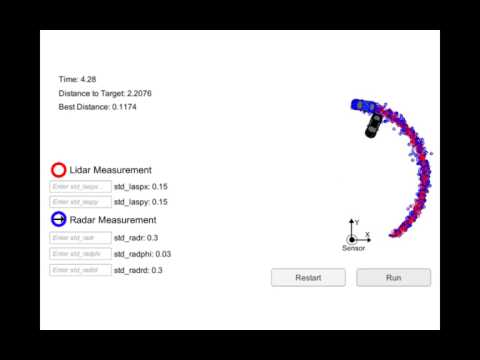

In [2]:
YouTubeVideo('klDOvr29KfM', width=960, height=540)

# 6. Unscented Kalman Filters

## Project Submission
1. Clone/fork the project's template files from the [project repository](https://github.com/udacity/CarND-Unscented-Kalman-Filter-Project). (Note: Please do not submit your project as a pull request against our repo!)
2. Clone the visualization and data generation utilities from the utilities repository.
3. Build an Unscented Kalman Filter by applying the general processing flow as described in the previous lesson.
4. Test your code!
5. When you achieve an RMSE below the required values, submit your project! You can check the project rubric before submitting.